## ANLY_580_Project2_3+1

### Data Cleaning

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv("winemag-data-130k-v2.csv", index_col = 0, encoding = 'utf-8')

In [2]:
df.head(5)

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [3]:
print("Dataset has", df.shape[0], "rows", "and", df.shape[1], "columns.")

Dataset has 129971 rows and 13 columns.


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129971 entries, 0 to 129970
Data columns (total 13 columns):
country                  129908 non-null object
description              129971 non-null object
designation              92506 non-null object
points                   129971 non-null int64
price                    120975 non-null float64
province                 129908 non-null object
region_1                 108724 non-null object
region_2                 50511 non-null object
taster_name              103727 non-null object
taster_twitter_handle    98758 non-null object
title                    129971 non-null object
variety                  129970 non-null object
winery                   129971 non-null object
dtypes: float64(1), int64(1), object(11)
memory usage: 13.9+ MB


In [5]:
print("There are", df.duplicated().sum(), "duplicated records")

There are 9983 duplicated records


In [6]:
print("How many NAs are in the dataset?")
df.isnull().sum()

How many NAs are in the dataset?


country                     63
description                  0
designation              37465
points                       0
price                     8996
province                    63
region_1                 21247
region_2                 79460
taster_name              26244
taster_twitter_handle    31213
title                        0
variety                      1
winery                       0
dtype: int64

In [7]:
print("How many unique values are in each column?")
df.nunique()

How many unique values are in each column?


country                      43
description              119955
designation               37979
points                       21
price                       390
province                    425
region_1                   1229
region_2                     17
taster_name                  19
taster_twitter_handle        15
title                    118840
variety                     707
winery                    16757
dtype: int64

In [8]:
# We drop the columns that we don't need
df2 = df.drop(['designation','taster_twitter_handle', 
                'region_1', 'region_2', 'title'], axis = 1)

In [9]:
# We drop all duplicated rows
df2 = df2.drop_duplicates()

In [10]:
# We drop all NAs
df2 = df2.dropna()

In [11]:
print("Dataset now has", df2.shape[0], "rows", "and", df2.shape[1], "columns.")

Dataset now has 88264 rows and 8 columns.


In [12]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88264 entries, 1 to 129970
Data columns (total 8 columns):
country        88264 non-null object
description    88264 non-null object
points         88264 non-null int64
price          88264 non-null float64
province       88264 non-null object
taster_name    88264 non-null object
variety        88264 non-null object
winery         88264 non-null object
dtypes: float64(1), int64(1), object(6)
memory usage: 6.1+ MB


In [13]:
# Convert the price to integer
df2["price"] = df2.price.astype(int)

In [14]:
print("There are", df2.duplicated().sum(), "duplicated records")

There are 0 duplicated records


In [15]:
print("How many NAs are in the dataset?")
df2.isnull().sum()

How many NAs are in the dataset?


country        0
description    0
points         0
price          0
province       0
taster_name    0
variety        0
winery         0
dtype: int64

In [16]:
print("How many unique values are in each column?")
df2.nunique()

How many unique values are in each column?


country           42
description    88244
points            21
price            381
province         417
taster_name       19
variety          653
winery         13832
dtype: int64

In [18]:
# We reset the index
df2 = df2.reset_index(drop = True)
df2.head(5)

,country,description,points,price,province,taster_name,variety,winery
0,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15,Douro,Roger Voss,Portuguese Red,Quinta dos Avidagos
1,US,"Tart and snappy, the flavors of lime flesh and...",87,14,Oregon,Paul Gregutt,Pinot Gris,Rainstorm
2,US,"Pineapple rind, lemon pith and orange blossom ...",87,13,Michigan,Alexander Peartree,Riesling,St. Julian
3,US,"Much like the regular bottling from 2012, this...",87,65,Oregon,Paul Gregutt,Pinot Noir,Sweet Cheeks
4,Spain,Blackberry and raspberry aromas show a typical...,87,15,Northern Spain,Michael Schachner,Tempranillo-Merlot,Tandem


## Feature Engineering and EDA

In [19]:
# Convert the description to lowercase letter
des_list = list(df2.description)
des_list_lower = [string.lower() for string in des_list]
df2["description"] = des_list_lower

In [20]:
df2[:5]

,country,description,points,price,province,taster_name,variety,winery
0,Portugal,"this is ripe and fruity, a wine that is smooth...",87,15,Douro,Roger Voss,Portuguese Red,Quinta dos Avidagos
1,US,"tart and snappy, the flavors of lime flesh and...",87,14,Oregon,Paul Gregutt,Pinot Gris,Rainstorm
2,US,"pineapple rind, lemon pith and orange blossom ...",87,13,Michigan,Alexander Peartree,Riesling,St. Julian
3,US,"much like the regular bottling from 2012, this...",87,65,Oregon,Paul Gregutt,Pinot Noir,Sweet Cheeks
4,Spain,blackberry and raspberry aromas show a typical...,87,15,Northern Spain,Michael Schachner,Tempranillo-Merlot,Tandem


In [22]:
# Check the summary statistics of wine rating and price
print("Summary statistics for points and price:")
df2.describe()

Summary statistics for points and price:


,points,price
count,88264.000000,88264.000000
mean,88.581392,35.293902
std,3.008554,44.406137
min,80.000000,4.000000
25%,87.000000,17.000000
50%,88.000000,25.000000
75%,91.000000,42.000000
max,100.000000,3300.000000


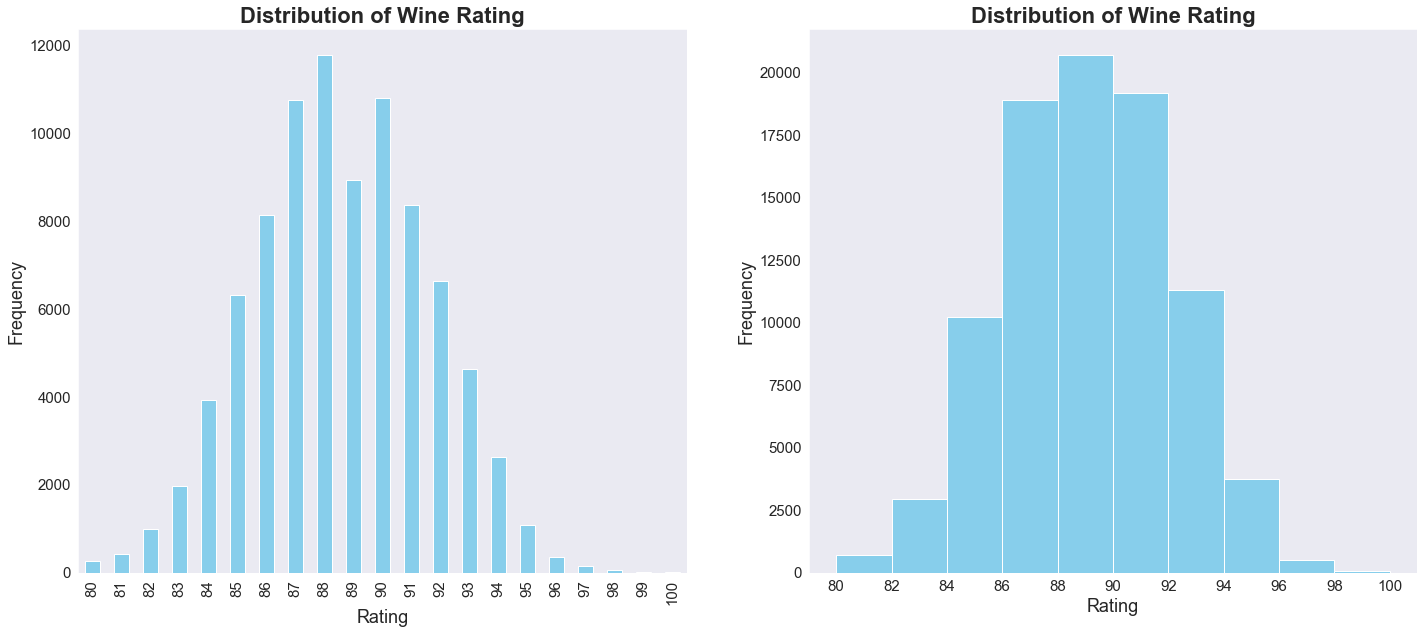

In [24]:
# Check the distribution of wine rating
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("dark")
plt.figure(figsize = (24,10))

plt.subplot(121)
df2.groupby(['points']).count()['description'].plot(kind='bar', color = "skyblue")
plt.xticks(fontsize = 15) # X Ticks
plt.yticks(fontsize = 15) # Y Ticks
plt.title('Distribution of Wine Rating', fontweight = "bold", size = 22) # Title
plt.ylabel('Frequency', fontsize = 18) # Y label
plt.xlabel('Rating', fontsize = 18) # X label

plt.subplot(122)
n, points_bins, patches = plt.hist(df2["points"], density = False, color = 'skyblue')
plt.xticks(points_bins,fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("Rating", fontsize = 18)
plt.ylabel("Frequency", fontsize = 18)
plt.title("Distribution of Wine Rating", fontsize = 22, fontweight = "bold")
plt.show()

In [25]:
# From the figures above, we can see the frequency of 89 is relatively low
# If we bin the wine rating into 10 classes, we will have a very normal distribution
# Thus, we bin the wine rating into 10 classes:
# 0: [80,82], 1: (82,84], 2: (84,86], 3: (86,88], 4: (88,90], 5: (90,92], 6: (92,94], 7: (94,96], 8: (96,98], 9: (98,100]
df2["points_bins"] = pd.cut(df2.points, points_bins, include_lowest = True, labels = range(len(points_bins) - 1))
df2.head(5)

,country,description,points,price,province,taster_name,variety,winery,points_bins
0,Portugal,"this is ripe and fruity, a wine that is smooth...",87,15,Douro,Roger Voss,Portuguese Red,Quinta dos Avidagos,3
1,US,"tart and snappy, the flavors of lime flesh and...",87,14,Oregon,Paul Gregutt,Pinot Gris,Rainstorm,3
2,US,"pineapple rind, lemon pith and orange blossom ...",87,13,Michigan,Alexander Peartree,Riesling,St. Julian,3
3,US,"much like the regular bottling from 2012, this...",87,65,Oregon,Paul Gregutt,Pinot Noir,Sweet Cheeks,3
4,Spain,blackberry and raspberry aromas show a typical...,87,15,Northern Spain,Michael Schachner,Tempranillo-Merlot,Tandem,3


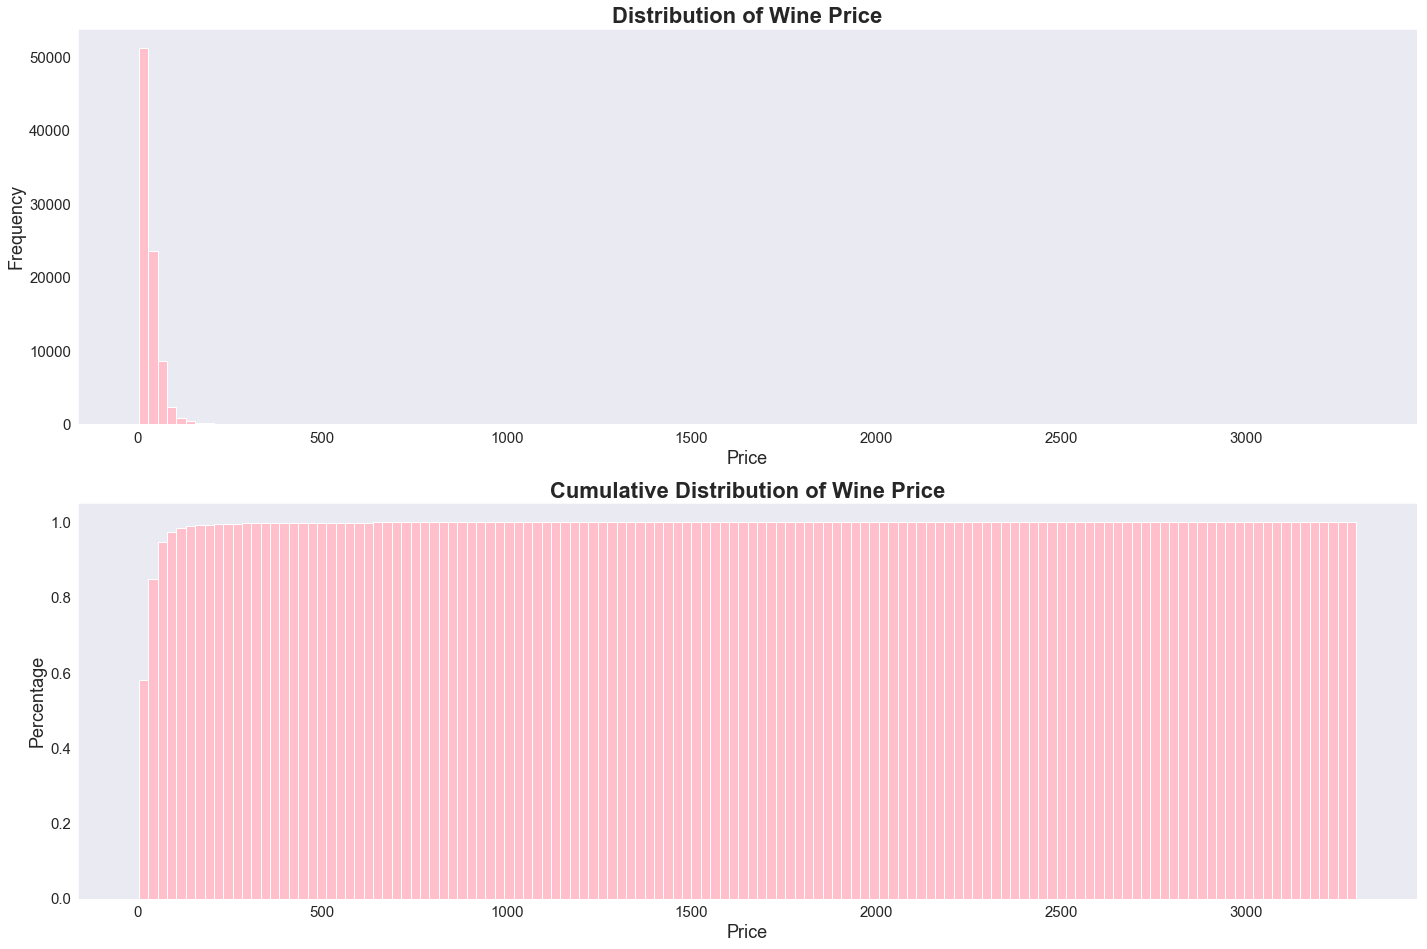

In [26]:
# Check the distribution of wine price and cumulative distribution of wine price
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("dark")
plt.figure(figsize = (24,16))

plt.subplot(211)
plt.hist(df2["price"], color = "pink", density = False, bins = 130)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("Price", fontsize = 18)
plt.ylabel("Frequency", fontsize = 18)
plt.title("Distribution of Wine Price", fontsize = 22, fontweight = "bold")

plt.subplot(212)
plt.hist(df2["price"], color = "pink", density = True, cumulative = True, bins = 130)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("Price", fontsize = 18)
plt.ylabel("Percentage", fontsize = 18)
plt.title("Cumulative Distribution of Wine Price", fontsize = 22, fontweight = "bold")

plt.show()

In [28]:
# Price of wine is very skewed. Thus, we will focus on points

In [27]:
print("The correlation between price and points is", np.corrcoef(df2["points"], df2["price"])[0][1])

The correlation between price and points is 0.40391801209976175


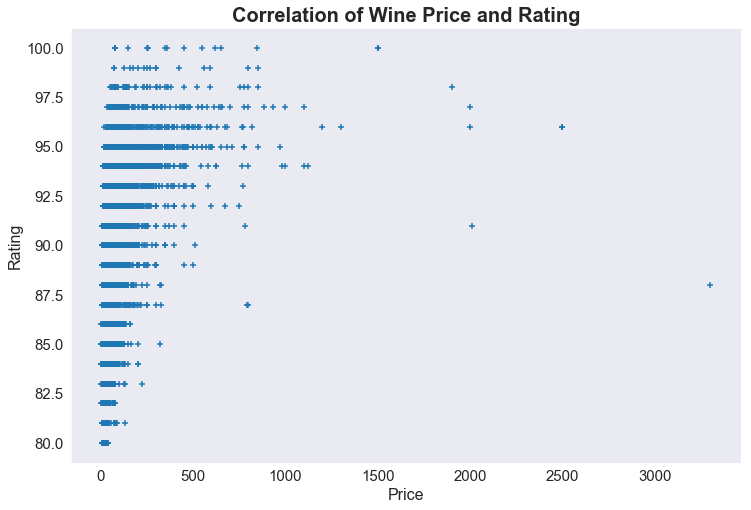

In [29]:
# Check the correlation of wine price and rating
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("dark")
plt.figure(figsize = (12,8))
plt.scatter(df2["price"], df2["points"], edgecolor = "black", marker = "+")
plt.xlabel("Price", fontsize = 16)
plt.xticks(fontsize = 15)
plt.ylabel("Rating", fontsize = 16)
plt.yticks(fontsize = 15)
plt.title("Correlation of Wine Price and Rating", fontweight = "bold", fontsize = 20)
plt.show()

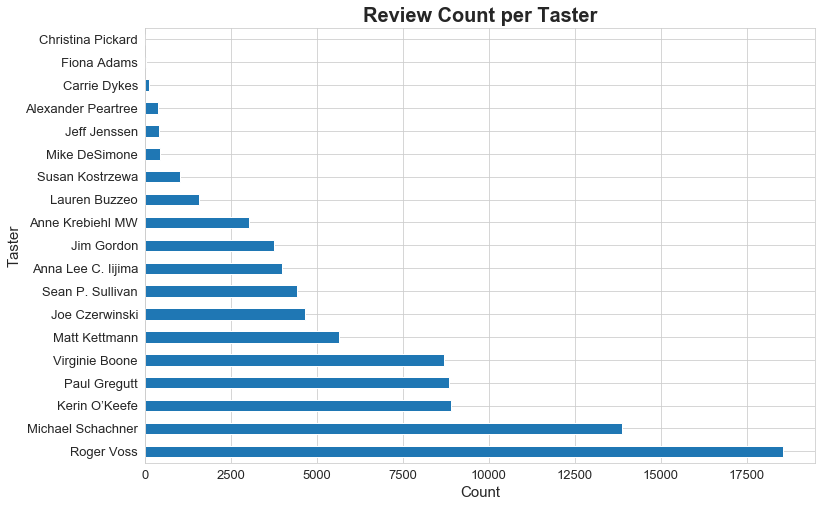

In [30]:
# Check the count of reviews per reviewers
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")
plt.figure(figsize = (12,8))
plt.title("Review Count per Taster", fontsize = 20, fontweight = "bold")
plt.xlabel("Count", fontsize = 15)
plt.ylabel("Taster", fontsize =15)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
df2['taster_name'].value_counts().plot(kind='barh')
plt.show()

In [31]:
print("Count of Reviews per Reviewer")
df2.taster_name.value_counts()

Count of Reviews per Reviewer


Roger Voss            18543
Michael Schachner     13864
Kerin O’Keefe          8885
Paul Gregutt           8837
Virginie Boone         8682
Matt Kettmann          5643
Joe Czerwinski         4643
Sean P. Sullivan       4422
Anna Lee C. Iijima     3974
Jim Gordon             3761
Anne Krebiehl MW       3028
Lauren Buzzeo          1581
Susan Kostrzewa        1006
Mike DeSimone           441
Jeff Jenssen            415
Alexander Peartree      381
Carrie Dykes            128
Fiona Adams              24
Christina Pickard         6
Name: taster_name, dtype: int64

In [33]:
# We will group all the reviewers who have less than 3000 reviews into one category as "other reviewers".
taster_4000 = list(df2.taster_name.value_counts()[df2.taster_name.value_counts() > 3000].index)
taster_list =[
    x if x in taster_4000
    else "Other Reviewer" 
    for x in df2.taster_name
]

df2["new_taster_name"] = taster_list
df2.head(5)

,country,description,points,price,province,taster_name,variety,winery,points_bins,new_taster_name
0,Portugal,"this is ripe and fruity, a wine that is smooth...",87,15,Douro,Roger Voss,Portuguese Red,Quinta dos Avidagos,3,Roger Voss
1,US,"tart and snappy, the flavors of lime flesh and...",87,14,Oregon,Paul Gregutt,Pinot Gris,Rainstorm,3,Paul Gregutt
2,US,"pineapple rind, lemon pith and orange blossom ...",87,13,Michigan,Alexander Peartree,Riesling,St. Julian,3,Other Reviewer
3,US,"much like the regular bottling from 2012, this...",87,65,Oregon,Paul Gregutt,Pinot Noir,Sweet Cheeks,3,Paul Gregutt
4,Spain,blackberry and raspberry aromas show a typical...,87,15,Northern Spain,Michael Schachner,Tempranillo-Merlot,Tandem,3,Michael Schachner


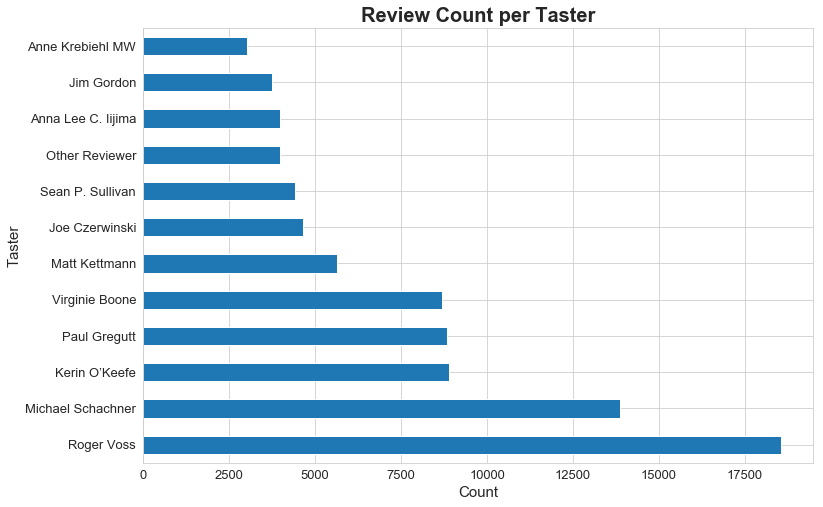

In [34]:
# Check the Count of reviews per reviewers after upated
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")
plt.figure(figsize = (12,8))
plt.title("Review Count per Taster", fontsize = 20, fontweight = "bold")
plt.xlabel("Count", fontsize = 15)
plt.ylabel("Taster", fontsize =15)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
df2['new_taster_name'].value_counts().plot(kind='barh')
plt.show()

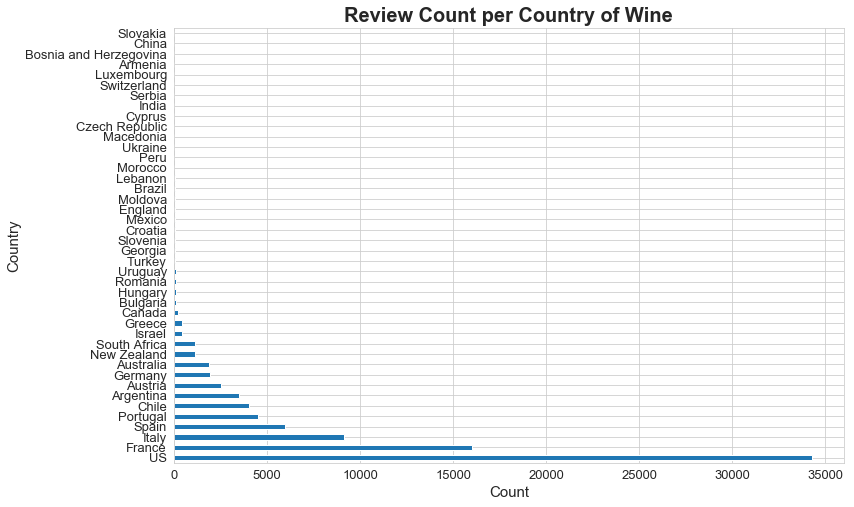

In [35]:
# Check the count of reviews per country of wine
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")
plt.figure(figsize = (12,8))
plt.title("Review Count per Country of Wine", fontsize = 20, fontweight = "bold")
plt.xlabel("Count", fontsize = 15)
plt.ylabel("Country", fontsize =15)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
df2['country'].value_counts().plot(kind='barh')
plt.show()

In [36]:
print("Count of Reviews per Country of Wine")
df2.country.value_counts()

Count of Reviews per Country of Wine


US                        34265
France                    16041
Italy                      9130
Spain                      5985
Portugal                   4497
Chile                      4019
Argentina                  3499
Austria                    2528
Germany                    1924
Australia                  1887
New Zealand                1143
South Africa               1123
Israel                      448
Greece                      427
Canada                      223
Bulgaria                    132
Hungary                     127
Romania                     102
Uruguay                      98
Turkey                       81
Georgia                      74
Slovenia                     70
Croatia                      68
Mexico                       63
England                      59
Moldova                      56
Brazil                       44
Lebanon                      32
Morocco                      24
Peru                         16
Ukraine                      14
Macedoni

In [37]:
# We will group all countries which have less than 2000 reviews into one category as "other countries".
country_2000 = list(df2.country.value_counts()[df2.country.value_counts() > 2000].index)
country_list =[
    x if x in country_2000
    else "Other Country" 
    for x in df2.country
]

df2["new_country"] = country_list

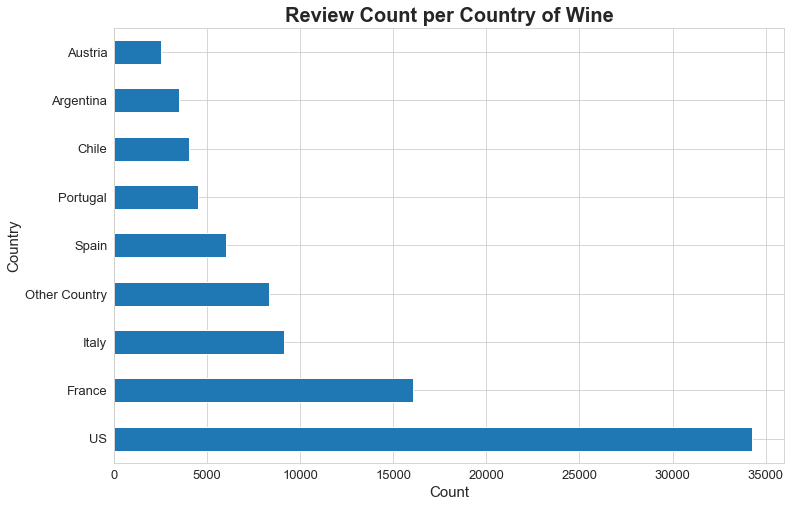

In [38]:
# Check the count of reviews per country again after updated
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")
plt.figure(figsize = (12,8))
plt.title("Review Count per Country of Wine", fontsize = 20, fontweight = "bold")
plt.xlabel("Count", fontsize = 15)
plt.ylabel("Country", fontsize =15)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
df2['new_country'].value_counts().plot(kind='barh')
plt.show()

In [39]:
# Since the figure of review counts by variety is too messy,
# we will simply check the table of count
print("Count of Reviews per Variety of Wine")
df2.variety.value_counts()

Count of Reviews per Variety of Wine


Pinot Noir                    9015
Chardonnay                    7587
Red Blend                     6255
Cabernet Sauvignon            5717
Bordeaux-style Red Blend      4455
Riesling                      4331
Sauvignon Blanc               3507
Syrah                         2844
Rosé                          2732
Malbec                        2327
Portuguese Red                2028
Merlot                        1911
Sangiovese                    1643
Nebbiolo                      1599
Tempranillo                   1597
White Blend                   1517
Sparkling Blend               1502
Zinfandel                     1444
Pinot Gris                    1157
Rhône-style Red Blend         1126
Grüner Veltliner              1012
Champagne Blend               1010
Cabernet Franc                 985
Portuguese White               905
Gewürztraminer                 769
Gamay                          749
Viognier                       699
Shiraz                         672
Bordeaux-style White

In [40]:
# We will group all variety which have less than 1000 reviews into one category as "other variety".
variety_1000 = list(df2.variety.value_counts()[df2.variety.value_counts() > 1000].index)
variety_list =[
    x if x in variety_1000
    else "Other Variety" 
    for x in df2.variety
]

df2["new_variety"] = variety_list

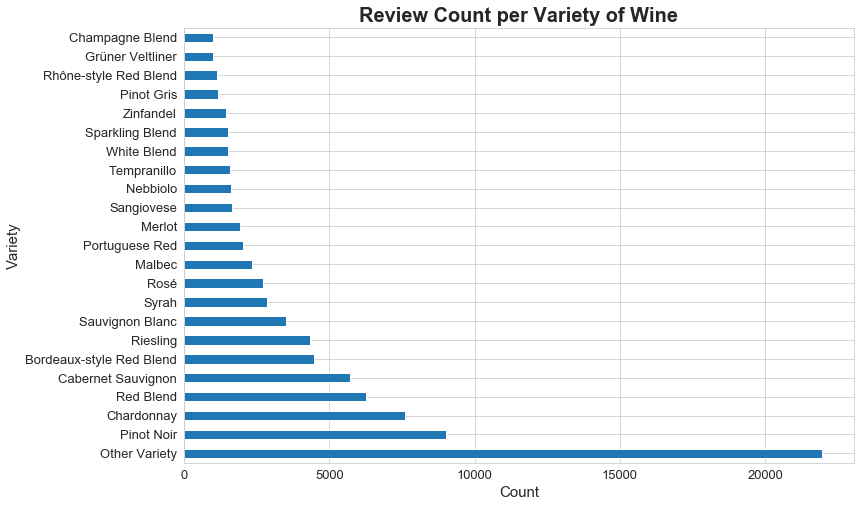

In [41]:
# Check the count of reviews per variety after updated
# Although the distribution of variety looks much better than before we grouping the varieties,
# it's still very unbalanced. Other variety is more than twice as Pinot Noir. 
# Therefore, variety is probably not good for predicting but might be good as a feature to include in our model.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")
plt.figure(figsize = (12,8))
plt.title("Review Count per Variety of Wine", fontsize = 20, fontweight = "bold")
plt.xlabel("Count", fontsize = 15)
plt.ylabel("Variety", fontsize =15)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
df2['new_variety'].value_counts().plot(kind='barh')
plt.show()

In [42]:
# Figure is too messy, we will just check the table
print("Count of Reviews per Winery")
df2.winery.value_counts()

Count of Reviews per Winery


Wines & Winemakers                199
DFJ Vinhos                        194
Chateau Ste. Michelle             170
Concha y Toro                     152
Louis Latour                      152
Columbia Crest                    145
Georges Duboeuf                   112
Trapiche                          107
Santa Ema                         103
Montes                            102
Testarossa                         99
Maryhill                           97
Undurraga                          96
Jean-Luc and Paul Aegerter         91
Chehalem                           91
Georges Vigouroux                  89
Seven Hills                        89
Chanson Père et Fils               88
Louis Jadot                        88
Errazuriz                          87
D'Arenberg                         87
Williams Selyem                    87
Joseph Drouhin                     86
J. Portugal Ramos                  86
Dr. Loosen                         85
Naggiar                            84
Santa Rita  

In [43]:
print("The number of unique value of winery is", df2["winery"].nunique())

The number of unique value of winery is 13832


In [44]:
# Same situation happened in winery. There are too much unique values (13832) in winery, 
# and every unique winery has the count of reviews around 100 - 200.
# It will be useless to group some of them into one category even for using as a feature in our model.
# Therefore, we will not manipulate the winery here, but just drop it.

df2 = df2.drop(["winery"], axis = 1)

In [45]:
df2.head(10)

,country,description,points,price,province,taster_name,variety,points_bins,new_taster_name,new_country,new_variety
0,Portugal,"this is ripe and fruity, a wine that is smooth...",87,15,Douro,Roger Voss,Portuguese Red,3,Roger Voss,Portugal,Portuguese Red
1,US,"tart and snappy, the flavors of lime flesh and...",87,14,Oregon,Paul Gregutt,Pinot Gris,3,Paul Gregutt,US,Pinot Gris
2,US,"pineapple rind, lemon pith and orange blossom ...",87,13,Michigan,Alexander Peartree,Riesling,3,Other Reviewer,US,Riesling
3,US,"much like the regular bottling from 2012, this...",87,65,Oregon,Paul Gregutt,Pinot Noir,3,Paul Gregutt,US,Pinot Noir
4,Spain,blackberry and raspberry aromas show a typical...,87,15,Northern Spain,Michael Schachner,Tempranillo-Merlot,3,Michael Schachner,Spain,Other Variety
5,Italy,"here's a bright, informal red that opens with ...",87,16,Sicily & Sardinia,Kerin O’Keefe,Frappato,3,Kerin O’Keefe,Italy,Other Variety
6,France,this dry and restrained wine offers spice in p...,87,24,Alsace,Roger Voss,Gewürztraminer,3,Roger Voss,France,Other Variety
7,Germany,savory dried thyme notes accent sunnier flavor...,87,12,Rheinhessen,Anna Lee C. Iijima,Gewürztraminer,3,Anna Lee C. Iijima,Other Country,Other Variety
8,France,this has great depth of flavor with its fresh ...,87,27,Alsace,Roger Voss,Pinot Gris,3,Roger Voss,France,Pinot Gris
9,US,"soft, supple plum envelopes an oaky structure ...",87,19,California,Virginie Boone,Cabernet Sauvignon,3,Virginie Boone,US,Cabernet Sauvignon


In [46]:
df2.to_csv("wine_review_cleaned.csv")